
Case 1: Manhattan
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Cost: 8
Optimal? True


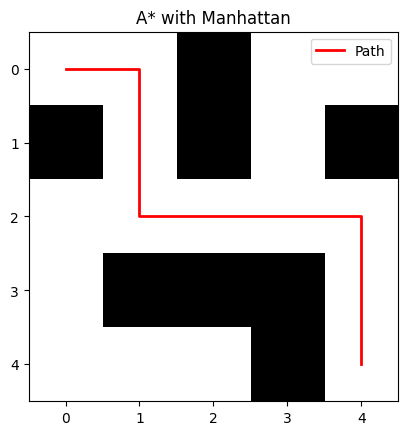


Case 2: 1.5 * Manhattan
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Cost: 8
Optimal? True


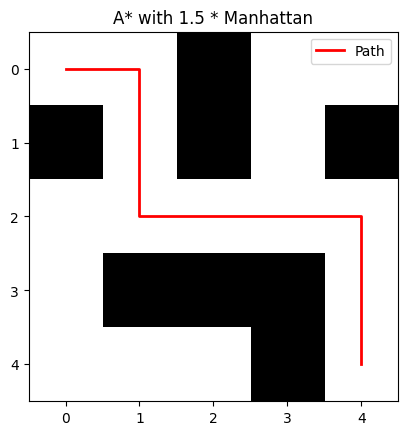


Case 3: Inconsistent
Path found: [(0, 0), (0, 1), (1, 1), (2, 1), (2, 2), (2, 3), (2, 4), (3, 4), (4, 4)]
Cost: 8
Optimal? True


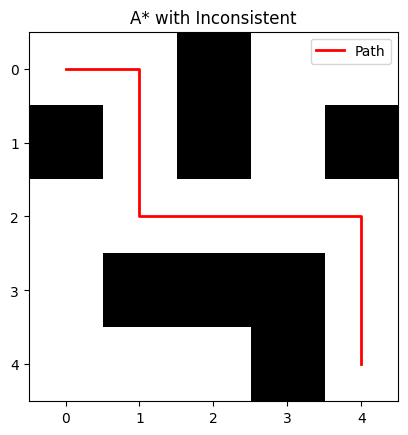

In [2]:
import heapq
import matplotlib.pyplot as plt
import numpy as np

# ---------- Helper Functions ----------
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def heuristic(case, node, goal):
    h = manhattan(node, goal)
    if case == 1:  # Normal admissible Manhattan
        return h
    elif case == 2:  # Scaled heuristic
        return 1.5 * h
    elif case == 3:  # Inconsistent heuristic
        # Example: subtract 1 if moving left (breaks consistency)
        return h - 1 if node[0] % 2 == 0 else h
    return h

# ---------- A* Search ----------
def astar(maze, start, goal, case=1):
    rows, cols = len(maze), len(maze[0])
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(case, start, goal), 0, start, [start]))
    visited = set()

    while open_set:
        f, g, current, path = heapq.heappop(open_set)
        if current in visited:
            continue
        visited.add(current)

        if current == goal:
            return path, g  # found path

        for dx, dy in [(1,0),(-1,0),(0,1),(0,-1)]:
            nx, ny = current[0] + dx, current[1] + dy
            if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] != 1:
                new_g = g + 1
                heapq.heappush(open_set, (new_g + heuristic(case, (nx, ny), goal),
                                          new_g, (nx, ny), path + [(nx, ny)]))
    return None, float('inf')  # no path

# ---------- Visualization ----------
def visualize(maze, path, title):
    grid = np.array(maze)
    plt.imshow(grid, cmap="gray_r")

    if path:
        px, py = zip(*path)
        plt.plot(py, px, color="red", linewidth=2, label="Path")
    plt.title(title)
    plt.legend()
    plt.show()

# ---------- Main ----------
# Define a maze
maze = [
    ['A',0,1,0,0],
    [1,0,1,0,1],
    [0,0,0,0,0],
    [0,1,1,1,0],
    [0,0,0,1,'B']
]

# Convert maze to numeric form
start, goal = None, None
for i in range(len(maze)):
    for j in range(len(maze[0])):
        if maze[i][j] == 'A':
            start = (i,j)
            maze[i][j] = 0
        elif maze[i][j] == 'B':
            goal = (i,j)
            maze[i][j] = 0
maze = [[1 if cell == 1 else 0 for cell in row] for row in maze]

# Run all cases
for case, name in [(1,"Manhattan"), (2,"1.5 * Manhattan"), (3,"Inconsistent")]:
    path, cost = astar(maze, start, goal, case)
    print(f"\nCase {case}: {name}")
    print("Path found:", path)
    print("Cost:", cost)

    # Check optimality by comparing to baseline (Manhattan)
    optimal_path, optimal_cost = astar(maze, start, goal, 1)
    is_optimal = (cost == optimal_cost)
    print("Optimal?", is_optimal)

    visualize(maze, path, f"A* with {name}")